In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.optimizers import Adam, SGD
import numpy as np
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import os
import sys
from tqdm import tqdm

In [3]:
os.chdir(r"C:\Users\hanya\Desktop\MSBD5001 Group Project\Individual Project")

### Data Preprocessing

In [98]:
training_data = pd.read_csv('./train.csv').drop('id', axis=1)
test_data = pd.read_csv('./test.csv').drop('id',axis=1)
training_data['n_jobs'].loc[training_data['n_jobs']==-1] = 16
test_data['n_jobs'].loc[test_data['n_jobs']==-1] = 16
training_label = training_data['time']
data_corr = training_data.corr()['time']

C:\Users\hanya\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [61]:
col_drop = pd.Series(index=['random_state'])

In [62]:
all_data = pd.concat([training_data.drop('time',axis=1), test_data])#.drop('id',axis=1)])
all_data.drop(col_drop.index,axis=1, inplace=True)

In [63]:
### feature construction
all_data['n_samples_n_jobs'] = all_data['n_samples']/all_data['n_jobs']
all_data['max_iter_n_jobs'] = all_data['max_iter']/all_data['n_jobs']
all_data['max_iter_n_samples'] = all_data['max_iter']*all_data['n_samples']
all_data['n_samples_n_features'] = all_data['n_samples']*all_data['n_features']
all_data['n_samples_n_features_max_iter'] = all_data['n_samples']*all_data['n_features']*all_data['max_iter']

In [64]:
### Data Normalization
all_data1 = all_data.copy()
all_data = pd.concat([all_data1['penalty'],(all_data.iloc[:, 1:] - all_data.iloc[:, 1:].mean())/ all_data.iloc[:, 1:].std()], axis = 1)

In [67]:
### Rerference from the results before
ref = pd.read_csv('./ref.csv', engine='python')

In [99]:
new_data = pd.get_dummies(all_data)
training_len = 400 #len(training_df_data)-test_training
test_training = len(training_data) - training_len
test_len = len(test_data)
training_label = np.log1p(np.log1p(np.log1p(training_label)))
# training_label = to_categorical(training_label)

X_train = new_data.iloc[:training_len, :] # training data--cross validation
X_train_test =  new_data.iloc[training_len:training_len+test_training, :] # training data--test
y_train =training_label.iloc[:training_len] # training labels--cross validation
y_train_test = training_label.iloc[-test_training:] # training label--test
x_test = new_data.iloc[-test_len:, :] # test data

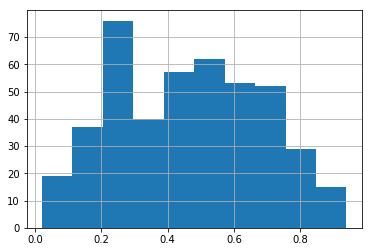

In [100]:
training_label.hist()

### NN

In [107]:
### Neural Network for L1
def model_nn(X_train, y_train, X_train_test=None, y_train_test=None):
    x_train = X_train
    y_train = y_train
    x_test = X_train_test
    y_test = y_train_test

    model = Sequential()
    #model.add(Dense(30, activation='relu', input_dim=20))
    #model.add(Dropout(0.5))
    #model.add(Dense(30, activation='relu'))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(1))

    adm = Adam(lr=0.03, decay=1e-6)
    model.compile(loss='mean_squared_error',
                  optimizer=adm)

    model.fit(x_train, y_train,
              epochs=10,
              batch_size=16)
    score = model.evaluate(x_test, y_test, batch_size=16)
    return model, score

In [ ]:
ml1 = []
for i in tqdm(range(1)):
    ml1.append(model_nn(np.reshape(X_train.values, (400,20,1)), y_train.values, 
                        np.reshape(X_train_test.values, (40,20,1)), y_train_test))


  0%|                                                                                   | 0/1 [00:00<?, ?it/s]

In [103]:
ml1

[(<keras.engine.sequential.Sequential at 0x125365b0390>, 0.06270631104707718)]

In [104]:
ml_lstm = ml1[0][0]
(np.expm1(np.expm1(np.expm1(pd.DataFrame(ml_lstm.predict(np.reshape(X_train.values, (400,20,1))), 
              index=y_train.index))))[0] - np.expm1(np.expm1(np.expm1(y_train)))).sum()/400

-1.9050203335381397

In [105]:
np.expm1(np.expm1(np.expm1(pd.DataFrame(ml_lstm.predict(np.reshape(x_test.values, (100,20,1)))))))

,0
0,1.29731
1,1.29731
2,1.29731
3,1.29731
4,1.29731
5,1.29731
6,1.29731
7,1.29731
8,1.29731
9,1.29731


In [ ]:
pd.DataFrame( np.expm1(ml1[0].predict(x_test)) ).to_csv('test_smoothing.csv')

In [ ]:
y_train.shape

In [ ]:
.to_csv('test_smoothing.csv')